<a href="https://colab.research.google.com/github/saimumadil24/FakeNewsDetection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Importing dataset
data=pd.read_csv('/content/drive/MyDrive/Datasets/news.csv')
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [ ]:
#Shape of the dataset
data.shape

(6335, 4)

<Axes: xlabel='count', ylabel='label'>

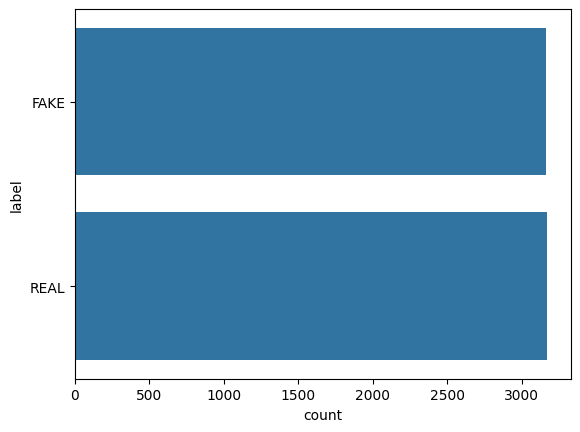

In [ ]:
#The ratio of the dataset
sb.countplot(data['label'])

In [ ]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [ ]:
#Dataset is balanced. That's we can continue to the splitting dataset
x=data['text']
y=data['label']

In [ ]:
#taking train and test dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=7)

In [ ]:
#initialize the tfidfvectorizer and fittng the x dataset
tfdf=TfidfVectorizer(stop_words='english',max_df=.7)
xtraintf=tfdf.fit_transform(xtrain)
xtesttf=tfdf.transform(xtest)

In [ ]:
#model evalueation
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(xtraintf,ytrain)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
#Score for this
ypred=pac.predict(xtesttf)
pac.score(xtesttf,ytest)

0.9337016574585635

In [ ]:
#Trhough accuracy score and confusion matrix
score_1=accuracy_score(ytest,ypred)
mat=confusion_matrix(ytest,ypred)
print(f"Accuracy Score: {score_1}, Confusion Matrix: {mat}")

Accuracy Score: 0.9337016574585635, Confusion Matrix: [[592  46]
 [ 38 591]]
